In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

In [60]:
files = [file for file in os.listdir('./Sales_data')]
df = pd.DataFrame()
for file in files:
  df = pd.concat([df,pd.read_csv('./Sales_data/' + file)])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Explorating, trasforming data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [62]:
df.rename(columns={'Order Date': 'order_date','Order ID':"id", 'Quantity Ordered':'quantity','Price Each':'price','Purchase Address':"address"},inplace=True)

In [63]:
df.describe()

,id,Product,quantity,price,order_date,address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [64]:
df.isnull().sum()

id            545
Product       545
quantity      545
price         545
order_date    545
address       545
dtype: int64

In [65]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [66]:
df = df[pd.to_numeric(df['id'], errors='coerce').notnull()]

In [67]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['quantity'] = df['quantity'].astype('int32')
df['id'] = df['id'].astype('int32')
df['price'] = df['price'].astype('float')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          185686 non-null  int32         
 1   Product     185686 non-null  object        
 2   quantity    185686 non-null  int32         
 3   price       185686 non-null  float64       
 4   order_date  185686 non-null  datetime64[ns]
 5   address     185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 8.5+ MB


In [69]:
df['sales'] = df['quantity'] * df['price']
df['month'] = df['order_date'].dt.month
df['weekday'] = df['order_date'].dt.day_name()
df['num_weekday'] = df['order_date'].dt.dayofweek
df['zipcode'] = df['address'].apply(lambda x: x[x.rindex(" ")+1:])
df['address'] = df['address'].apply(lambda x: x[:x.rindex(" ")])
df['city'] = df['address'].apply(lambda x: x[x.find(",")+1:])

In [70]:
df.head()

,id,Product,quantity,price,order_date,address,sales,month,weekday,num_weekday,zipcode,city
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA",700.00,1,Tuesday,1,02215,"Boston, MA"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR",14.95,1,Monday,0,97035,"Portland, OR"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA",23.98,1,Thursday,3,94016,"San Francisco, CA"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA",149.99,1,Saturday,5,90001,"Los Angeles, CA"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX",11.99,1,Friday,4,73301,"Austin, TX"


In [71]:
df.nunique()

id             178437
Product            19
quantity            9
price              17
order_date     142395
address        140787
sales              54
month              12
weekday             7
num_weekday         7
zipcode            10
city               10
dtype: int64

## Data Analytic

### Monthly trend and daily trend for sales

In [72]:
monthly_trend = df.groupby(['month'])['quantity','sales'].agg('sum').reset_index()
monthly_trend

,month,quantity,sales
0,1,10893,1821413.16
1,2,13431,2200078.08
2,3,16979,2804973.35
3,4,20536,3389217.98
4,5,18653,3150616.23
5,6,15234,2576280.15
6,7,16054,2646461.32
7,8,13429,2241083.37
8,9,13091,2094465.69
9,10,22669,3734777.86


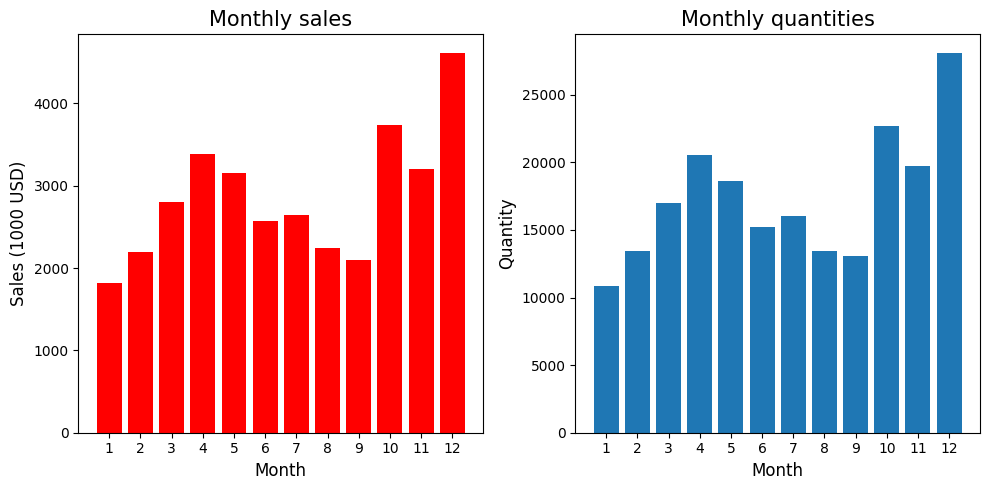

In [91]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].bar(monthly_trend.month,monthly_trend.sales/1000,color='r')
ax[0].set_xticks(range(1,13))
ax[0].set_xlabel('Month',fontsize=12)
ax[0].set_ylabel('Sales (1000 USD)',fontsize=12)
ax[0].set_title('Monthly sales', fontsize=15)

ax[1].bar(monthly_trend.month,monthly_trend.quantity)
ax[1].set_xticks(range(1,13))
ax[1].set_xlabel('Month',fontsize=12)
ax[1].set_ylabel('Quantities',fontsize=12)
ax[1].set_title('Monthly quantities', fontsize=15)
plt.tight_layout()
plt.show()

In [74]:
daily_trend = df.groupby(['weekday'])['quantity','sales'].agg('sum').reset_index().merge(df[['weekday','num_weekday']].drop_duplicates(), on='weekday').sort_values('num_weekday')
daily_trend

,weekday,quantity,sales,num_weekday
1,Monday,29860,4877588.21,0
5,Tuesday,30686,5086275.40,1
6,Wednesday,29759,4986823.36,2
4,Thursday,29618,4833763.73,3
0,Friday,29415,4853642.26,4
2,Saturday,29729,4900195.58,5
3,Sunday,29745,4927249.40,6


In [75]:
city_trend = df.groupby(['city'])['quantity','sales'].agg('sum').reset_index()
city_trend

,city,quantity,sales
0,"Atlanta, GA",16584,2794199.07
1,"Austin, TX",11137,1818044.33
2,"Boston, MA",22494,3658627.65
3,"Dallas, TX",16707,2765373.96
4,"Los Angeles, CA",33247,5448304.28
5,"New York City, NY",27903,4661867.14
6,"Portland, ME",2746,449321.38
7,"Portland, OR",11291,1870010.56
8,"San Francisco, CA",50169,8254743.55
9,"Seattle, WA",16534,2745046.02


### City trend for sales

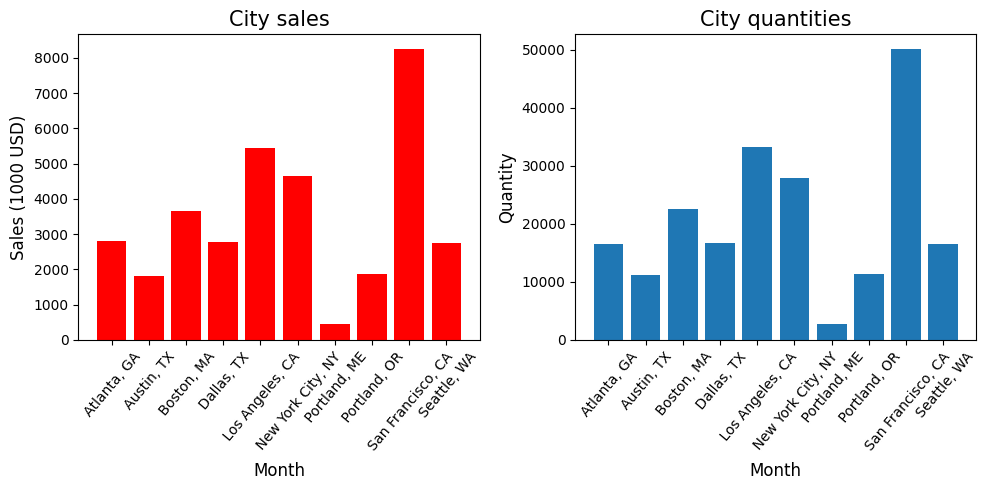

In [88]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].bar(city_trend.city,city_trend.sales/1000,color='r')
ax[0].set_xlabel('Month',fontsize=12)
ax[0].set_ylabel('Sales (1000 USD)',fontsize=12)
ax[0].set_title('City sales', fontsize=15)
ax[0].set_xticklabels(city_trend.city,rotation=50)

ax[1].bar(city_trend.city,city_trend.quantity)
ax[1].set_xlabel('Month',fontsize=12)
ax[1].set_ylabel('Quantities',fontsize=12)
ax[1].set_title('City quantities', fontsize=15)
ax[1].set_xticklabels(city_trend.city, rotation=50)
plt.tight_layout()
plt.show()

### Sales per hour in a day, from that we know what time should be chosen to display advertisements to maximize the likelihood of purchases

In [77]:
df['hour'] = df['order_date'].dt.hour

Text(0.5, 1.0, 'Total orders per hour')

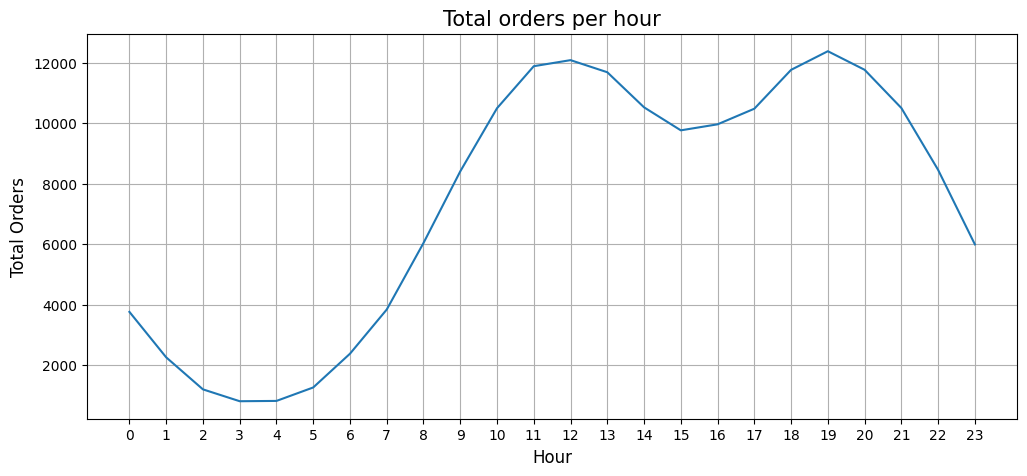

In [92]:
plt.figure(figsize=(12,5))
df[['id','hour']].drop_duplicates().groupby('hour')['id'].agg('count').plot()
plt.xticks(range(24))
plt.grid()
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title('Total orders per hour', fontsize=15)

### What products are most oftend sold together, from that we can give a discount when customer buy this pair of products

In [79]:
from itertools import combinations
from collections import Counter

counter = Counter()
product_order = df.groupby('id')['Product'].apply(list).apply(lambda x: sorted(x)).reset_index()

In [80]:
product_order.sort_values(by='id')

,id,Product
0,141234,[iPhone]
1,141235,[Lightning Charging Cable]
2,141236,[Wired Headphones]
3,141237,[27in FHD Monitor]
4,141238,[Wired Headphones]
...,...,...
178432,319666,[Lightning Charging Cable]
178433,319667,[AA Batteries (4-pack)]
178434,319668,[Vareebadd Phone]
178435,319669,[Wired Headphones]


In [81]:
count = Counter()
for row in product_order['Product']:
  count.update(Counter(combinations(row,2)))

In [82]:
for key,value in count.most_common(10):
  print(key, value)

('Lightning Charging Cable', 'iPhone') 1011
('Google Phone', 'USB-C Charging Cable') 997
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 422
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 203
('Vareebadd Phone', 'Wired Headphones') 149
('Lightning Charging Cable', 'Wired Headphones') 129


### Sale per product

In [83]:
product_sold = df.groupby('Product').agg({'price': 'mean','quantity': 'sum', 'sales': 'sum', }).reset_index()

In [84]:
product_sold

,Product,price,quantity,sales
0,20in Monitor,109.99,4126,453818.74
1,27in 4K Gaming Monitor,389.99,6239,2433147.61
2,27in FHD Monitor,149.99,7541,1131074.59
3,34in Ultrawide Monitor,379.99,6192,2352898.08
4,AA Batteries (4-pack),3.84,27615,106041.60
5,AAA Batteries (4-pack),2.99,30986,92648.14
6,Apple Airpods Headphones,150.00,15637,2345550.00
7,Bose SoundSport Headphones,99.99,13430,1342865.70
8,Flatscreen TV,300.00,4813,1443900.00
9,Google Phone,600.00,5529,3317400.00


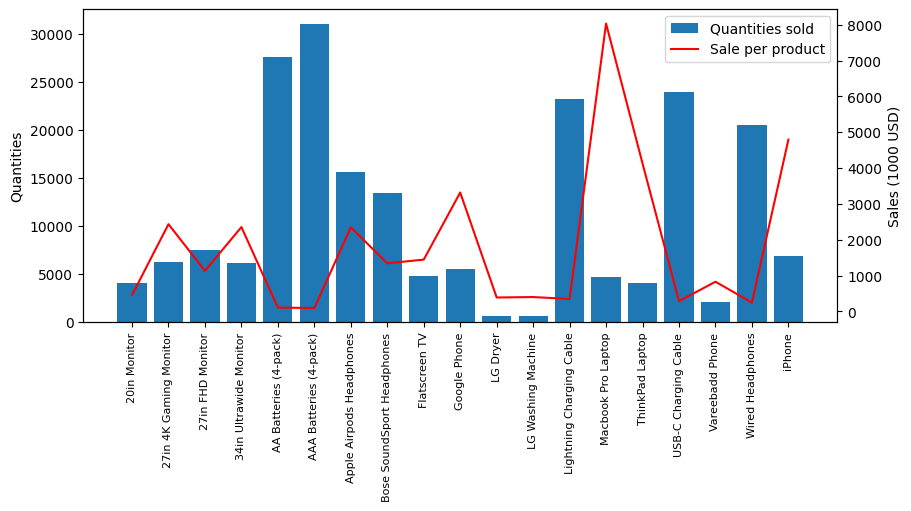

In [105]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(9,5),constrained_layout=True)

ax.bar(product_sold.Product, product_sold.quantity, label='Quantities sold')
ax.set_ylabel('Quantities')
ax.set_xticklabels(product_sold.Product, rotation = 90, size=8)
leg = plt.legend()

ax2 = ax.twinx()
ax2.plot(product_sold.Product, product_sold.sales/1000, label='Sale per product', color='red')
ax2.set_ylabel('Sales (1000 USD)')
leg2 = plt.legend()

plt.legend(leg.get_patches()+leg2.get_lines(),
           [text.get_text() for text in leg.get_texts()+leg2.get_texts()])
leg.remove()
plt.show()